In [12]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [11]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load mô hình ResNet50 đã được huấn luyện trước trên tập dữ liệu ImageNet
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Đường dẫn tới ảnh
img_path = 'dongho.jpg'  # Thay thế bằng đường dẫn thực tế

# Load ảnh và thay đổi kích thước
img = image.load_img(img_path, target_size=(224, 224))

# Chuyển ảnh thành numpy array
img_array = image.img_to_array(img)

# Thêm chiều để có batch size
img_array = np.expand_dims(img_array, axis=0)

# Tiền xử lý ảnh (để phù hợp với định dạng của ResNet50)
img_array = preprocess_input(img_array)

# Trích xuất đặc trưng
features = model.predict(img_array)

# Hiển thị mảng đặc trưng
print(features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
[[0.02051756 1.0080352  0.3126499  ... 1.9364917  0.69150543 2.3683298 ]]


In [15]:
img_path2 = 'test.jpg'  # Thay thế bằng đường dẫn thực tế

# Load ảnh và thay đổi kích thước
img2 = image.load_img(img_path, target_size=(224, 224))

# Chuyển ảnh thành numpy array
img_array2 = image.img_to_array(img)

# Thêm chiều để có batch size
img_array2 = np.expand_dims(img_array, axis=0)

# Tiền xử lý ảnh (để phù hợp với định dạng của ResNet50)
img_array2 = preprocess_input(img_array)

# Trích xuất đặc trưng
features2 = model.predict(img_array)

# Hiển thị mảng đặc trưng
print(features2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
[[0.12879045 1.8224372  0.17692742 ... 0.02780418 1.1404388  1.0493988 ]]


In [3]:
def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

print(euclidean_distance(features, features2))

NameError: name 'features' is not defined

In [21]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

# Khởi tạo mô hình ResNet50
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Đường dẫn đến thư mục chứa ảnh
image_dir = 'image'

def extract_features(img_path):
    # Load ảnh và thay đổi kích thước
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Chuyển ảnh thành numpy array
    img_array = image.img_to_array(img)
    
    # Thêm chiều để có batch size
    img_array = np.expand_dims(img_array, axis=0)
    
    # Tiền xử lý ảnh
    img_array = preprocess_input(img_array)
    
    # Trích xuất đặc trưng
    features = model.predict(img_array)
    return features.flatten()

# Lấy danh sách tất cả các ảnh trong thư mục
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if os.path.splitext(fname)[1].lower() in image_extensions]

# Trích xuất đặc trưng cho tất cả các ảnh
features_list = [extract_features(img_path) for img_path in image_paths]
features_array = np.array(features_list)
print(features_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1

In [22]:
import numpy as np
from scipy.spatial.distance import cdist

# Tính ma trận khoảng cách giữa tất cả các phần tử
distance_matrix = cdist(features_array, features_array, metric='euclidean')

# Đặt các giá trị khoảng cách từ một phần tử đến chính nó là vô cùng để không chọn chính nó làm phần tử gần nhất
np.fill_diagonal(distance_matrix, np.inf)

# Tìm phần tử gần nhất với mỗi phần tử
closest_indices = np.argmin(distance_matrix, axis=1)

# In ra phần tử gần nhất cho mỗi phần tử
for i, closest_index in enumerate(closest_indices):
    print(f"Image: {image_paths[i]} is closest to Image: {image_paths[closest_index]}")


Image: image\ao.jpeg is closest to Image: image\jacket.jpeg
Image: image\ao2.jpeg is closest to Image: image\jacket.jpeg
Image: image\ao3.jpeg is closest to Image: image\tshirt2.jpeg
Image: image\ao4.jpeg is closest to Image: image\jacket.jpeg
Image: image\bottle.jpg is closest to Image: image\bottle2.jpeg
Image: image\bottle2.jpeg is closest to Image: image\bottle3.jpg
Image: image\bottle3.jpg is closest to Image: image\wtf.jpg
Image: image\bottle4.jpeg is closest to Image: image\wtf.jpg
Image: image\dongho.jpg is closest to Image: image\output.jpg
Image: image\es.jpeg is closest to Image: image\esp32.jpg
Image: image\esp32.jpg is closest to Image: image\es.jpeg
Image: image\giay.jpeg is closest to Image: image\images.jpeg
Image: image\images.jpeg is closest to Image: image\giay.jpeg
Image: image\jacket.jpeg is closest to Image: image\ao4.jpeg
Image: image\jacket2.jpeg is closest to Image: image\images.jpeg
Image: image\nguoidapxe.jpeg is closest to Image: image\nguoidapxe2.jpg
Image:

In [14]:
from sklearn.cluster import KMeans

# Số nhóm bạn muốn phân cụm
num_clusters = 10

# Khởi tạo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Huấn luyện mô hình phân cụm
kmeans.fit(features_array)

# Dự đoán nhóm cho mỗi ảnh
clusters = kmeans.predict(features_array)

# In kết quả nhóm cho mỗi ảnh
for img_path, cluster in zip(image_paths, clusters):
    print(f'Image: {img_path} is in cluster: {cluster}')

Image: image\ao.jpeg is in cluster: 7
Image: image\ao2.jpeg is in cluster: 8
Image: image\ao3.jpeg is in cluster: 7
Image: image\ao4.jpeg is in cluster: 7
Image: image\bottle.jpg is in cluster: 4
Image: image\bottle2.jpeg is in cluster: 4
Image: image\bottle3.jpg is in cluster: 4
Image: image\bottle4.jpeg is in cluster: 4
Image: image\dongho.jpg is in cluster: 3
Image: image\es.jpeg is in cluster: 4
Image: image\esp32.jpg is in cluster: 6
Image: image\giay.jpeg is in cluster: 0
Image: image\images.jpeg is in cluster: 5
Image: image\jacket.jpeg is in cluster: 7
Image: image\jacket2.jpeg is in cluster: 5
Image: image\nguoidapxe.jpeg is in cluster: 2
Image: image\nguoidapxe2.jpg is in cluster: 2
Image: image\oto1.jpeg is in cluster: 1
Image: image\oto2.jpeg is in cluster: 1
Image: image\oto3.jpeg is in cluster: 1
Image: image\oto4.jpeg is in cluster: 1
Image: image\oto5.jpeg is in cluster: 1
Image: image\output.jpg is in cluster: 3
Image: image\output_no_labels.jpg is in cluster: 3
Image:

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


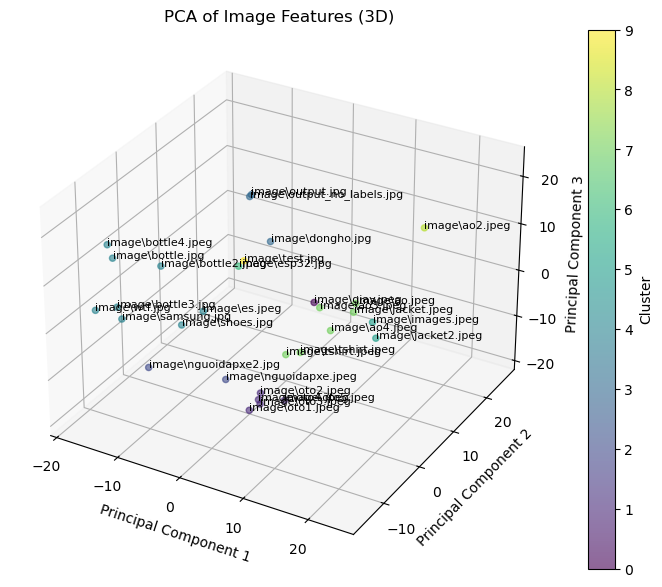

In [17]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Giảm chiều dữ liệu xuống 2 chiều
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(features_array)

# # Vẽ biểu đồ phân cụm
# plt.figure(figsize=(10, 7))
# scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
# plt.colorbar(scatter, label='Cluster')
# plt.title('PCA of Image Features')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mảng các tên hình ảnh và các cụm tương ứng
image_labels = [
    "image\\ao.jpeg", "image\\ao2.jpeg", "image\\ao3.jpeg", "image\\ao4.jpeg",
    "image\\bottle.jpg", "image\\bottle2.jpeg", "image\\bottle3.jpg", "image\\bottle4.jpeg",
    "image\\dongho.jpg", "image\\es.jpeg", "image\\esp32.jpg", "image\\giay.jpeg",
    "image\\images.jpeg", "image\\jacket.jpeg", "image\\jacket2.jpeg", "image\\nguoidapxe.jpeg",
    "image\\nguoidapxe2.jpg", "image\\oto1.jpeg", "image\\oto2.jpeg", "image\\oto3.jpeg",
    "image\\oto4.jpeg", "image\\oto5.jpeg", "image\\output.jpg", "image\\output_no_labels.jpg",
    "image\\samsung.jpg", "image\\shoes.jpg", "image\\test.jpg", "image\\tshirt.jpeg", "image\\tshirt.jpeg", "image\\wtf.jpg"
]

# Các cluster tương ứng với từng hình ảnh
# clusters = [5, 5, 5, 5, 4, 4, 4, 4, 6, 4, 0, 5, 5, 5, 7, 8, 8, 3, 3, 3, 3, 3, 6, 6, 2, 4, 9, 1, 4]

# Giảm chiều dữ liệu xuống 3 chiều
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features_array)  # features_array là mảng các đặc trưng của hình ảnh

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ các điểm dữ liệu trong không gian 3D
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')

# Thêm nhãn cho từng điểm
for i, label in enumerate(image_labels):
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], label, fontsize=8)

# Thiết lập tiêu đề và nhãn trục
ax.set_title('PCA of Image Features (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Hiển thị biểu đồ
plt.show()


In [5]:
git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git

SyntaxError: invalid syntax (119694634.py, line 1)

In [1]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

In [2]:
img_path = "image/oto2.jpeg"

In [3]:
results = model(img_path)


image 1/1 C:\Users\DELL\src_anaconda\image\oto2.jpeg: 416x640 1 truck, 77.0ms
Speed: 3.9ms preprocess, 77.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


In [4]:
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

In [ ]:


img = Image.open(img_path)
draw = ImageDraw.Draw(img)

result = results[0]

# # Vẽ bounding boxes lên hình ảnh
# for box in result.boxes:
#     x1, y1, x2, y2 = box.xyxy[0].tolist()
#     draw.rectangle([x1, y1, x2, y2], outline="green", width=3)

# Hiển thị hình ảnh với bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Ẩn trục
plt.show()

In [3]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model.save('resnet50_model.keras')

In [9]:
from tensorflow.keras.models import load_model
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import os

model2 = load_model('resnet50_model.keras')

image_dir = 'image'

def extract_features(img_path):
    # Load ảnh và thay đổi kích thước
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Chuyển ảnh thành numpy array
    img_array = image.img_to_array(img)
    
    # Thêm chiều để có batch size
    img_array = np.expand_dims(img_array, axis=0)
    
    # Tiền xử lý ảnh
    img_array = preprocess_input(img_array)
    
    # Trích xuất đặc trưng
    features = model2.predict(img_array)
    return features.flatten()

# Lấy danh sách tất cả các ảnh trong thư mục
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if os.path.splitext(fname)[1].lower() in image_extensions]

# Trích xuất đặc trưng cho tất cả các ảnh
features_list = [extract_features(img_path) for img_path in image_paths]
features_array = np.array(features_list)
print(features_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━